<a href="https://colab.research.google.com/github/prateekpurwar/tensorflow/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mlxtend==0.17.2

     |████████████████████████████████| 1.3MB 3.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, MaxPool2D, Dropout, Conv2D

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
print(tf.__version__)

2.2.0


In [0]:
cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
class_name = ['airplane' ,'automobile' ,'bird' ,'cat' ,'deer' ,'dog' ,'frog' ,'horse' ,'ship' ,'truck']

In [61]:
X_train.max()

255

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [63]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
input_shape = X_train[0].shape

frog


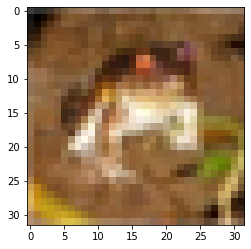

In [65]:
 plt.imshow(X_train[0])
 print(class_name[y_train[0][0]])

## Built CNN Model

In [0]:
model = Sequential(
    layers = [Conv2D(filters=32,kernel_size=(3,3), padding='valid', activation='relu', input_shape=input_shape),
              MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'),
              Conv2D(filters=64,kernel_size=(3,3), padding='valid', activation='relu'),
              MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'),
              Conv2D(filters=64,kernel_size=(3,3), padding='valid', activation='relu'),
              MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'),
              Dropout(0.5),
              Flatten(),
              Dense(units=64, activation='relu'),
              Dropout(0.3),
              Dense(units=128, activation='relu'),
              Dropout(0.5),
              Dense(units=10, activation='softmax')
             ]
)

In [67]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 2, 2, 64)         

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
history = model.fit(x=X_train, y=y_train, batch_size=64, verbose=1, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
782/782 [==============================] - 66s 84ms/step - loss: 1.9222 - accuracy: 0.2601 - val_loss: 1.5662 - val_accuracy: 0.4223
Epoch 2/15
782/782 [==============================] - 65s 84ms/step - loss: 1.5802 - accuracy: 0.4119 - val_loss: 1.4085 - val_accuracy: 0.4896
Epoch 3/15
782/782 [==============================] - 65s 82ms/step - loss: 1.4429 - accuracy: 0.4746 - val_loss: 1.3218 - val_accuracy: 0.5263
Epoch 4/15
782/782 [==============================] - 65s 83ms/step - loss: 1.3600 - accuracy: 0.5098 - val_loss: 1.1859 - val_accuracy: 0.5784
Epoch 5/15
782/782 [==============================] - 64s 82ms/step - loss: 1.2893 - accuracy: 0.5412 - val_loss: 1.1206 - val_accuracy: 0.5967
Epoch 6/15
782/782 [==============================] - 64s 82ms/step - loss: 1.2532 - accuracy: 0.5554 - val_loss: 1.0803 - val_accuracy: 0.6168
Epoch 7/15
782/782 [==============================] - 64s 82ms/step - loss: 1.2070 - accuracy: 0.5736 - val_loss: 1.1140 - val_accuracy:

In [0]:
def plot(history, epochs):
  epoch_range = range(1,epochs+1)
  
  plt.style.use('seaborn-white')

  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

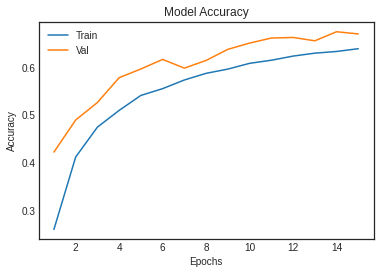

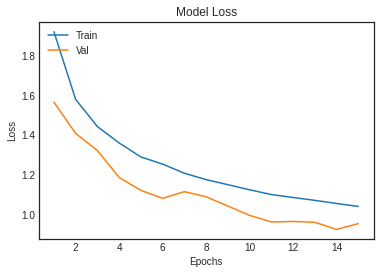

In [74]:
plot(history=history,epochs=15)

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
mat = confusion_matrix(y_test, y_pred)

In [77]:
mat

array([[687,  39,  57,  22,   8,   3,   8,  10,  98,  68],
       [  8, 835,   2,   8,   0,   1,   5,   2,  16, 123],
       [ 79,  12, 475, 115,  67,  70, 107,  27,  20,  28],
       [ 11,  14,  56, 497,  34, 237,  66,  25,  17,  43],
       [ 33,   7,  72, 115, 487,  41, 115, 103,   9,  18],
       [ 13,   7,  45, 221,  33, 596,  17,  39,   5,  24],
       [  6,  12,  30, 118,  32,  10, 756,   7,   6,  23],
       [ 17,   7,  24,  60,  45,  91,   4, 681,   2,  69],
       [ 61,  34,  12,  23,   0,   2,   4,   2, 811,  51],
       [  8,  61,   4,  15,   1,   1,   4,   1,  28, 877]])

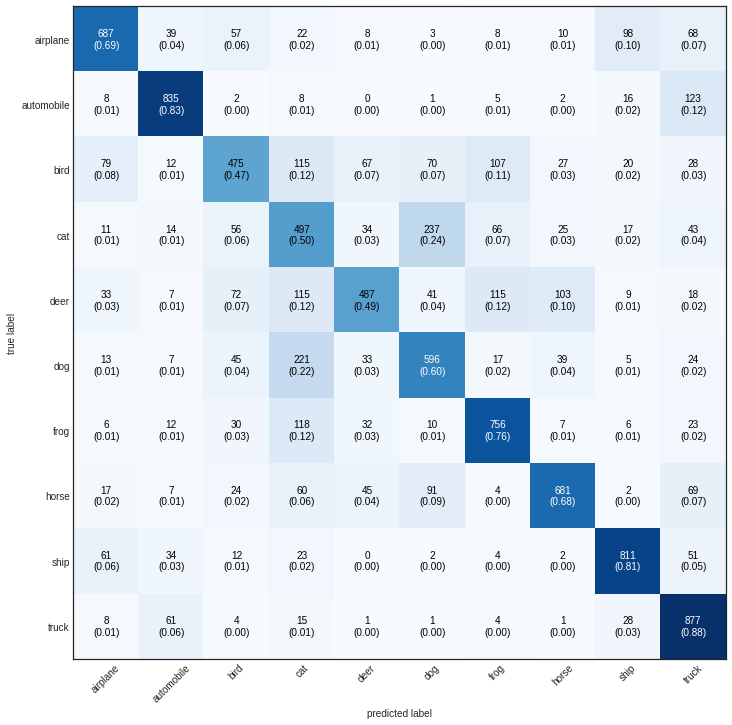

In [81]:
plot_confusion_matrix(mat, figsize=(12,12), class_names=class_name, show_normed=True)
plt.show()